###Bagging

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [4]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() #와인 데이터의 세가지 열을 넘파이 형태로 변환
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) #훈련, 테스트 데이터로 나누기

In [6]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) #교차검증을 통해 성능 확인

print(np.mean(scores['test_score']))

0.8905151032797809


In [7]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [8]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
#oob_score를 true로 하여 훈련 종료 후 out of bag 샘플을 기반으로 평가를 수행한다
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


###ExtraTrees

In [9]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
#랜덤포레스트보다 무작위성을 많이 가지는 앙상블 모델 엑스트라 트리
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8887848893166506


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


###Boosting

In [11]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
# Gradient Boosting을 이용해 학습해 학습률, 손실함수 등의 변수도 가지고 있다
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8780082549788999


In [12]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [13]:
hgb = HistGradientBoostingClassifier(random_state=42)
#히스토그램 기반으로 그레이디언트 부스팅을 수행한다
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8801241948619236


In [14]:
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
#각 변수를 재배열한 후의 예측력이 얼마나 변하는지 알려주는 변수 중요도를 측정한다
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [15]:
hgb.score(test_input, test_target)

0.8723076923076923

In [16]:
xgb = XGBClassifier(tree_method='hist', random_state=42)
#GradientBoosting의 단점을 보완한 Xgboost 모델
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8782000074035686


In [17]:
lgb = LGBMClassifier(random_state=42)
#속도가 느린 Xgboost의 단점을 보완한 LightGBM 모델
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


###군집화

In [45]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy! # 과일 데이터 다운

--2023-12-19 09:39:25--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-19 09:39:25--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-19 09:39:25--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [19]:
fruits = np.load('fruits_300.npy')

In [20]:
print(fruits.shape)

(300, 100, 100)


In [21]:
#(데이터 개수, 100, 100) 형태의 2차원 이미지 데이터를 일렬의 벡터로 펼쳐준다
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [22]:
print(apple.shape)

(100, 10000)


In [23]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [24]:
#3가지 과일의 펼친 벡터값들의 평균을 각각 구하고, 그 평균값들의 벡터를 다시 2차원 이미지 데이터로 바꾸어준다
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

In [25]:
#apple_mean과 과일 데이터 집합의 오차를 절댓값으로 계산해 평균을 내어 하나의 값으로 만든다
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


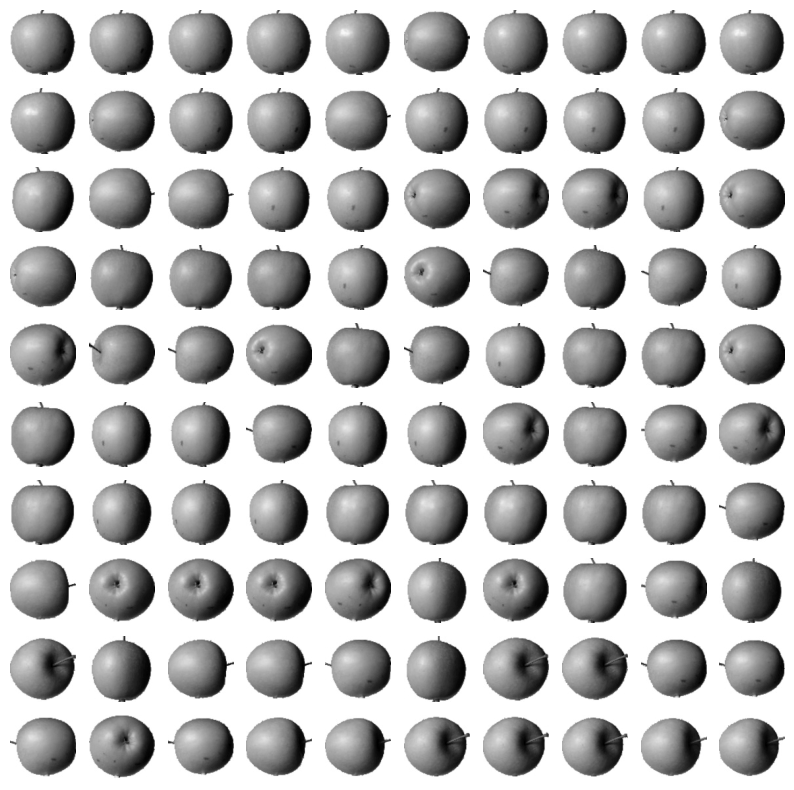

In [26]:
#오차가 가장 적은 100개의 데이터를 서브플롯을 이용해 한번에 출력한다
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

###K-Means

In [27]:
fruits_2d = fruits.reshape(-1, 100*100)

In [28]:
km = KMeans(n_clusters=3, random_state=42)
#중심점과의 거리를 측정해 군집화해주는 K-Means의 k 값을 3으로 지정해준다
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [29]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [30]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


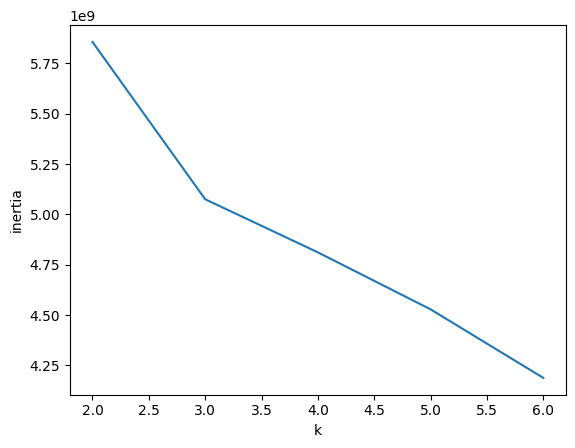

In [31]:
# elbow
#k값을 지정해주는 방식인 엘보우 기법에 대한 함수.
#k값에 따른 이너셔가 꺾이는 지점이 가장 적절한 k값이다
#위 데이터는 과일 종류가 3개이므로 k값 3에서 꺾이는 것을 볼 수 있다
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

###차원 축소

In [32]:
pca = PCA(n_components=50)
#대표적인 차원 축소 방식인 PCA
pca.fit(fruits_2d)

PCA(n_components=50)

In [33]:
print(pca.components_.shape)

(50, 10000)


In [34]:
print(fruits_2d.shape)

(300, 10000)


In [35]:
fruits_pca = pca.transform(fruits_2d)
#차원 축소를 적용해준다

In [36]:
print(fruits_pca.shape)
#10000개의 차원이 50개로 줄어든 것을 볼 수 있다

(300, 50)


In [37]:
fruits_inverse = pca.inverse_transform(fruits_pca)
#inverse_transform을 통해 다시 차원 축소를 한 데이터를 복구할 수 있다(어느 정도의 손실은 감수가 필요)
print(fruits_inverse.shape)

(300, 10000)


In [38]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

In [39]:
print(np.sum(pca.explained_variance_ratio_))
#설명된 분산 정도를 출력한다.

0.9215129786513805


In [66]:
lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [41]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.133047103881836


In [42]:
scores = cross_validate(lr, fruits_pca, target)
#차원 축소한 데이터를 이용한다
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#로지스틱 회귀 모델로 비교해봤을 때, 수행시간이 비약적으로 줄어든 것을 볼 수 있다

1.0
0.03700189590454102


In [43]:
km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

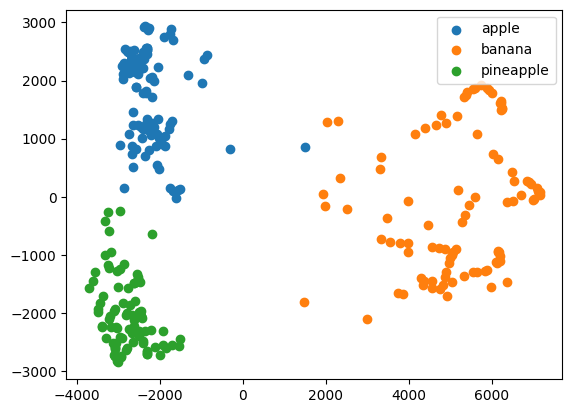

In [44]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

###과제

In [49]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy! # 과일 데이터 다운

--2023-12-19 09:40:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-19 09:40:57--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-19 09:40:57--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [50]:
fruits = np.load('fruits_300.npy')

In [51]:
fruits_2d = fruits.reshape(-1, 100*100)

In [53]:
pca = PCA(n_components=50)

In [55]:
pca.fit(fruits_2d)

PCA(n_components=50)

In [56]:
fruits_pca = pca.transform(fruits_2d)
#데이터의 차원이 너무 클 때는 엘보우 방식이 제대로 적용되지 않을 수도 있으므로 차원 축소를 해준다

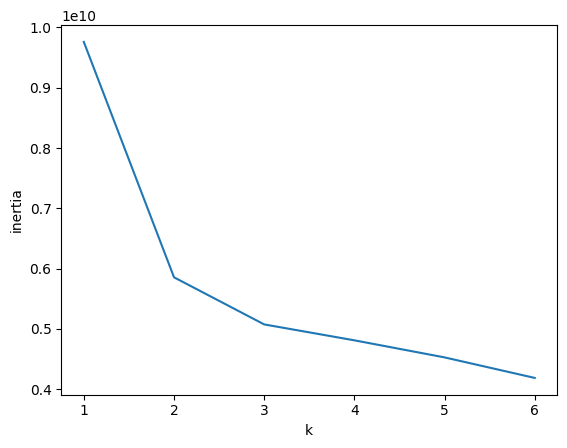

In [52]:
inertia = []
for k in range(1, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
#그래프가 2번 꺾였지만, 뒤에 꺾이는 지점인 3이 가장 적절한 값이다

In [57]:
km = KMeans(n_clusters=3, random_state=42)

In [59]:
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [80]:
from sklearn.cluster import DBSCAN

ds=DBSCAN(eps=7.0, min_samples=30)
ds.fit(fruits_pca)

DBSCAN(eps=7.0, min_samples=30)